# Machine Learning Engineer Nanodegree
## Supervised Learning
## Project 2: Building a Student Intervention System

Welcome to the second project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

### Question 1 - Classification vs. Regression
*Your goal for this project is to identify students who might need early intervention before they fail to graduate. Which type of supervised learning problem is this, classification or regression? Why?*

**Answer: **
Classification. We're classifying students as either 'need' or 'don't need' intervention, rather than fitting them to some continuous model.

## Exploring the Data
Run the code cell below to load necessary Python libraries and load the student data. Note that the last column from this dataset, `'passed'`, will be our target label (whether the student graduated or didn't graduate). All other columns are features about each student.

In [1]:
# Import libraries
import numpy as np
import pandas as pd
from time import time
from sklearn.metrics import f1_score

# Read student data
student_data = pd.read_csv("student-data.csv")
print "Student data read successfully!"

Student data read successfully!


### Implementation: Data Exploration
Let's begin by investigating the dataset to determine how many students we have information on, and learn about the graduation rate among these students. In the code cell below, you will need to compute the following:
- The total number of students, `n_students`.
- The total number of features for each student, `n_features`.
- The number of those students who passed, `n_passed`.
- The number of those students who failed, `n_failed`.
- The graduation rate of the class, `grad_rate`, in percent (%).


In [2]:
# TODO: Calculate number of students
n_students = len(student_data.index)

# TODO: Calculate number of features
n_features = len(student_data.columns) - 1 #don't include passing column

# TODO: Calculate passing students
passing_rates = student_data['passed'].value_counts()
n_passed = passing_rates['yes']

# TODO: Calculate failing students
n_failed = passing_rates['no']

# TODO: Calculate graduation rate
grad_rate = 10**2*n_passed/float(n_students)

# Print the results
print "Total number of students: {}".format(n_students)
print "Number of features: {}".format(n_features)
print "Number of students who passed: {}".format(n_passed)
print "Number of students who failed: {}".format(n_failed)
print "Graduation rate of the class: {:.2f}%".format(grad_rate)

Total number of students: 395
Number of features: 30
Number of students who passed: 265
Number of students who failed: 130
Graduation rate of the class: 67.09%


## Preparing the Data
In this section, we will prepare the data for modeling, training and testing.

### Identify feature and target columns
It is often the case that the data you obtain contains non-numeric features. This can be a problem, as most machine learning algorithms expect numeric data to perform computations with.

Run the code cell below to separate the student data into feature and target columns to see if any features are non-numeric.

In [3]:
# Extract feature columns
feature_cols = list(student_data.columns[:-1])

# Extract target column 'passed'
target_col = student_data.columns[-1] 

# Show the list of columns
print "Feature columns:\n{}".format(feature_cols)
print "\nTarget column: {}".format(target_col)

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = student_data[feature_cols]
y_all = student_data[target_col]

# Show the feature information by printing the first five rows
print "\nFeature values:"
print X_all.head()

Feature columns:
['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']

Target column: passed

Feature values:
  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher   
1     GP   F   17       U     GT3       T     1     1  at_home     other   
2     GP   F   15       U     LE3       T     1     1  at_home     other   
3     GP   F   15       U     GT3       T     4     2   health  services   
4     GP   F   16       U     GT3       T     3     3    other     other   

    ...    higher internet  romantic  famrel  freetime goout Dalc Walc health  \
0   ...       yes       no        no       4         3     4    1    1      3   
1   ...       

### Preprocess Feature Columns

As you can see, there are several non-numeric columns that need to be converted! Many of them are simply `yes`/`no`, e.g. `internet`. These can be reasonably converted into `1`/`0` (binary) values.

Other columns, like `Mjob` and `Fjob`, have more than two values, and are known as _categorical variables_. The recommended way to handle such a column is to create as many columns as possible values (e.g. `Fjob_teacher`, `Fjob_other`, `Fjob_services`, etc.), and assign a `1` to one of them and `0` to all others.

These generated columns are sometimes called _dummy variables_, and we will use the [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) function to perform this transformation. Run the code cell below to perform the preprocessing routine discussed in this section.

In [4]:
def preprocess_features(X):
    ''' Preprocesses the student data and converts non-numeric binary variables into
        binary (0/1) variables. Converts categorical variables into dummy variables. '''
    
    # Initialize new output DataFrame
    output = pd.DataFrame(index = X.index)

    # Investigate each feature column for the data
    for col, col_data in X.iteritems():
        
        # If data type is non-numeric, replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])

        # If data type is categorical, convert to dummy variables
        if col_data.dtype == object:
            # Example: 'school' => 'school_GP' and 'school_MS'
            col_data = pd.get_dummies(col_data, prefix = col)  
        
        # Collect the revised columns
        output = output.join(col_data)
    
    return output

X_all = preprocess_features(X_all)
print "Processed feature columns ({} total features):\n{}".format(len(X_all.columns), list(X_all.columns))

Processed feature columns (48 total features):
['school_GP', 'school_MS', 'sex_F', 'sex_M', 'age', 'address_R', 'address_U', 'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Medu', 'Fedu', 'Mjob_at_home', 'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher', 'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services', 'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other', 'reason_reputation', 'guardian_father', 'guardian_mother', 'guardian_other', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences']


### Further Preprocessing
Even using dummy variables for non-numeric features, we still haven't normalized all our data. Some features are numeric but use arbitrary scaling such as age in years, and with some estimators this will cause those features' weights to change disproportionately. Since I wish to use an SVM, one such sensitive estimator, later in the project I'll create a scaled version of the data to work with. 

A rudimentary method of scaling is to normalize all the features to the range [-1,1], which can be done with sklearn's scale function. This doesn't take into account feature importance, which means we might be losing information doing this, but for the scope of this project it will suit our purposes.

In [5]:
from sklearn.preprocessing import scale
import warnings

X_scaled = pd.DataFrame()

#Using scale here will give a DataConversionWarning for each feature that changes from int64 to float64. Since the goal is 
#to have all the data normalized over the same range, this is a necessary step and the warnings can be ignored.
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    for feature in X_all:
        X_scaled[feature] = scale(X_all[feature])
        
print X_scaled.head()

   school_GP  school_MS     sex_F     sex_M       age  address_R  address_U  \
0    0.36305   -0.36305  0.948176 -0.948176  1.023046  -0.535392   0.535392   
1    0.36305   -0.36305  0.948176 -0.948176  0.238380  -0.535392   0.535392   
2    0.36305   -0.36305  0.948176 -0.948176 -1.330954  -0.535392   0.535392   
3    0.36305   -0.36305  0.948176 -0.948176 -1.330954  -0.535392   0.535392   
4    0.36305   -0.36305  0.948176 -0.948176 -0.546287  -0.535392   0.535392   

   famsize_GT3  famsize_LE3  Pstatus_A    ...      higher  internet  romantic  \
0     0.636941    -0.636941   2.938392    ...     0.23094 -2.232677 -0.708450   
1     0.636941    -0.636941  -0.340322    ...     0.23094  0.447893 -0.708450   
2    -1.570004     1.570004  -0.340322    ...     0.23094  0.447893 -0.708450   
3     0.636941    -0.636941  -0.340322    ...     0.23094  0.447893  1.411533   
4     0.636941    -0.636941  -0.340322    ...     0.23094 -2.232677 -0.708450   

     famrel  freetime     goout      D

### Implementation: Training and Testing Data Split
So far, we have converted all _categorical_ features into numeric values. For the next step, we split the data (both features and corresponding labels) into training and test sets. In the following code cell below, you will need to implement the following:
- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 300 training points (approximately 75%) and 95 testing points (approximately 25%).
  - Set a `random_state` for the function(s) you use, if provided.
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`.

In [6]:
RANDOM_STATE = 10

# TODO: Import any additional functionality you may need here
from sklearn.cross_validation import train_test_split

# TODO: Set the number of training points
num_train = 300

# Set the number of testing points
num_test = X_scaled.shape[0] - num_train

# TODO: Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, stratify=y_all, train_size = num_train, 
                                                    random_state = RANDOM_STATE)

# Shuffle and split the scaled dataset in the same fashion
X_scaled_train, X_scaled_test, y_scaled_train, y_scaled_test = train_test_split(X_scaled, y_all, stratify=y_all,
                                                                                train_size = num_train, 
                                                                                random_state = RANDOM_STATE)

# Show the results of the split
print "Training set has {} samples.".format(X_train.shape[0])
print "Testing set has {} samples.".format(X_test.shape[0])

Training set has 300 samples.
Testing set has 95 samples.


### Balancing the Training Data
Having an imbalanced dataset can be problematic, it causes issues as a model can appear to be performing better by favoring the majority class. For example: our dataset being predominately students who passed, the F1 score for a model which always assumes a student will pass is over .8! To counteract this we can oversample the minority class using the SMOTE algorithm to create synthetic samples to achieve balance.

In [7]:
from imblearn.over_sampling import SMOTE

# Use SMOTE to create synthetic samples to balance training data
sm = SMOTE(kind='borderline2',random_state=RANDOM_STATE)
X_balanced, y_balanced = sm.fit_sample(X_train,y_train)
X_scaled_balanced, y_scaled_balanced = sm.fit_sample(X_scaled_train,y_scaled_train)

# Maintain unmodified training data for project questions
X_train_unbalanced = pd.DataFrame(data=X_train)
y_train_unbalanced = pd.Series(data=y_train)

# Update training data with synthetic samples
X_train = pd.DataFrame(data = X_balanced, columns = X_train.columns)
y_train = pd.Series(data = y_balanced)

X_scaled_train = pd.DataFrame(data = X_scaled_balanced, columns = X_train.columns)
y_scaled_train = pd.Series(data = y_scaled_balanced)

print "Total number of training points with over-sampling: {}".format(len(X_train))
print "New ratio of passing to not passing samples: {}".format(y_train.value_counts()['yes']/float(len(y_train)))

Total number of training points with over-sampling: 402
New ratio of passing to not passing samples: 0.5


## Training and Evaluating Models
In this section, you will choose 3 supervised learning models that are appropriate for this problem and available in `scikit-learn`. You will first discuss the reasoning behind choosing these three models by considering what you know about the data and each model's strengths and weaknesses. You will then fit the model to varying sizes of training data (100 data points, 200 data points, and 300 data points) and measure the F<sub>1</sub> score. You will need to produce three tables (one for each model) that shows the training set size, training time, prediction time, F<sub>1</sub> score on the training set, and F<sub>1</sub> score on the testing set.

**The following supervised learning models are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
*List three supervised learning models that are appropriate for this problem. For each model chosen*
- Describe one real-world application in industry where the model can be applied. *(You may need to do a small bit of research for this — give references!)* 
- What are the strengths of the model; when does it perform well? 
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**Answer: **
This seemed a fairly crucial part of the process, so rather than pick out three to focus on I looked into all of them. I've chosen three here that seemed would be the best choices and/or best to practice with, but a more comprehensive (though less well formatted) answer can be found in model_evaluations.txt in the project folder of the repo.

1. Gaussian Naive Bayes
  1. Classifying a person's cognitive activity based on brain imaging, as described here:
    https://www.cs.cmu.edu/~tom/10601_sp09/lectures/NBayes2_2-2-2009-ann.pdf
  2. GNB is efficient in both learning and predicting, and works well with a small feature-to-sample ratio. It outputs in probabilities, rather than binary classification, which can be useful in decision making based on predictions.
  3. GNB is bad at regression. It also assumes conditional independence, so for datasets with strong intercorrelations it does poorly. It's a fairly simple model, and as such has a high bias and low variance as compared with other models (e.g. LR)
  4.  Our dataset is fairly small, with a relatively large number of features, which is where Naive Bayes does well. It is also very efficient, which was a requirement of the job. I don't expect GNB to be the best choice, it's very simple and the assumptions that features are independent and fit a standard distribution may not be wise, but it can serve as a good baseline.

2. Random Forest
  1. "Decision trees have been used for the detection of physical particles", i.e. quarks. Source, along with many other 
examples, here:
http://www.cbcb.umd.edu/~salzberg/docs/murthy_thesis/survey/node32.html
  2. Decision trees work well with non-linear relationships and can provide very intuitive and easily visualized explanations for predictions. They work well out of the box, as feature selection is done automatically and doesn't require scaling. Random Forest is a bagging method which reduces the variance of decision trees, their biggest weakness.
  3. Decision trees are prone to overfitting and local optima, though this is mitigated using Random Trees. It's also somewhat unstable, as small changes in the data have the potential to result in a completely different tree. The ease of interpretation breaks down as the model gets more complex, such as in an ensemble method like Random Forest.
  4. Random Forest is accurate and efficient out of the box, doing the work of feature selection automatically and mitigating the problems of lone decision trees. It can also tell us the importance of each feature, which could potentially not only predict potential failures but provide actionable suggestions for interventions.

3. Support Vector Machine
  1. Text categorization, e.g. classifying Usenet News messages as computation, religion, statistics, etc. As described, 
along with other examples, here:
https://arxiv.org/pdf/math/0612817.pdf
  2. Support vector machines are good at handling a large feature space, as well as non-linear relationships. They're versatile, and provide a lot of opportunity for tuning.
  3. SVMs aren't great when the classes aren't seperable or there isn't enough margin (though a different kernel could alleviate those problems). They're also sensitive to feature scaling so, while versatile, their hyperparamater needs mean that it can be a lot of work to set up.
  4. Looking at the data it seems a reasonable assumption that the relationship is non-linear. We also have a small dataset, so it should be very efficient.

### Setup
Run the code cell below to initialize three helper functions which you can use for training and testing the three supervised learning models you've chosen above. The functions are as follows:
- `train_classifier` - takes as input a classifier and training data and fits the classifier to the data.
- `predict_labels` - takes as input a fit classifier, features, and a target labeling and makes predictions using the F<sub>1</sub> score.
- `train_predict` - takes as input a classifier, and the training and testing data, and performs `train_clasifier` and `predict_labels`.
 - This function will report the F<sub>1</sub> score for both the training and testing data separately.

In [8]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print "Trained model in {:.4f} seconds".format(end - start)

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    end = time()
    
    # Print and return results
    print "Made predictions in {:.4f} seconds.".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print "Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print "F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test))

### Implementation: Model Performance Metrics
With the predefined functions above, you will now import the three supervised learning models of your choice and run the `train_predict` function for each one. Remember that you will need to train and predict on each classifier for three different training set sizes: 100, 200, and 300. Hence, you should expect to have 9 different outputs below — 3 for each model using the varying training set sizes. In the following code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `clf_A`, `clf_B`, and `clf_C`.
 - Use a `random_state` for each model you use, if provided.
 - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Create the different training set sizes to be used to train each model.
 - *Do not reshuffle and resplit the data! The new training points should be drawn from `X_train` and `y_train`.*
- Fit each model with each training set size and make predictions on the test set (9 in total).  
**Note:** Three tables are provided after the following code cell which can be used to store your results.

In [9]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state = RANDOM_STATE)
clf_C = SVC(random_state = RANDOM_STATE)

# TODO: Set up the training set sizes
X_train_100 = X_train_unbalanced[:100]
y_train_100 = y_train_unbalanced[:100]

X_train_200 = X_train_unbalanced[:200]
y_train_200 = y_train_unbalanced[:200]

X_train_300 = X_train_unbalanced
y_train_300 = y_train_unbalanced

# TODO: Execute the 'train_predict' function for each classifier and each training set size
train_predict(clf_A, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_A, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_A, X_train_300, y_train_300, X_test, y_test)
print ''
train_predict(clf_B, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_B, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_B, X_train_300, y_train_300, X_test, y_test)
print ''
train_predict(clf_C, X_train_100, y_train_100, X_test, y_test)
train_predict(clf_C, X_train_200, y_train_200, X_test, y_test)
train_predict(clf_C, X_train_300, y_train_300, X_test, y_test)

Training a GaussianNB using a training set size of 100. . .
Trained model in 0.0020 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8467.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7538.
Training a GaussianNB using a training set size of 200. . .
Trained model in 0.0010 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.8205.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7576.
Training a GaussianNB using a training set size of 300. . .
Trained model in 0.0010 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.8106.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7786.

Training a RandomForestClassifier using a training set size of 100. . .
Trained model in 0.0330 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9925.
Made predictions in 0.0010 seconds.
F1 score for test set: 0.7353.
Training a RandomForestClassifier using a training set size of 200.

### Tabular Results
Edit the cell below to see how a table can be designed in [Markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet#tables). You can record your results from above in the tables provided.

** Classifier 1 - Gaussian Naive Bayes**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0020                  | 0.0010                 | 0.8467           | 0.7538          |
| 200               | 0.0020                  | 0.0010                 | 0.8205           | 0.7576          |
| 300               | 0.0020                  | 0.0010                 | 0.8106           | 0.7786          |

** Classifier 2 - Random Forest**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0400                  | 0.0020                 | 0.9925           | 0.7353          |
| 200               | 0.0320                  | 0.0010                 | 0.9963           | 0.7716          |
| 300               | 0.0390                  | 0.0020                 | 0.9900           | 0.7538          |

** Classifier 3 - Support Vector Machine**  

| Training Set Size | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| 100               | 0.0020                  | 0.0010                 | 0.8375           | 0.7975          |
| 200               | 0.0040                  | 0.0030                 | 0.8750           | 0.7895          |
| 300               | 0.0090                  | 0.0060                 | 0.8602           | 0.8212          |

### Model Performance Using Balanced Training Data
Here I repeat the test on the full training set using the balanced data. In the case of the SVM the scaled and balanced data is used.

In [10]:
train_predict(clf_A, X_train, y_train, X_test, y_test)
print ''
train_predict(clf_B, X_train, y_train, X_test, y_test)
print ''
train_predict(clf_C, X_scaled_train, y_scaled_train, X_scaled_test, y_scaled_test)

Training a GaussianNB using a training set size of 402. . .
Trained model in 0.0030 seconds
Made predictions in 0.0010 seconds.
F1 score for training set: 0.7586.
Made predictions in 0.0000 seconds.
F1 score for test set: 0.7377.

Training a RandomForestClassifier using a training set size of 402. . .
Trained model in 0.0400 seconds
Made predictions in 0.0020 seconds.
F1 score for training set: 0.9925.
Made predictions in 0.0020 seconds.
F1 score for test set: 0.6667.

Training a SVC using a training set size of 402. . .
Trained model in 0.0150 seconds
Made predictions in 0.0000 seconds.
F1 score for training set: 0.9578.
Made predictions in 0.0160 seconds.
F1 score for test set: 0.7883.


**Default Model Performance Using Balanced Data**  

| Classifier        | Training Time | Prediction Time (test) | F1 Score (train) | F1 Score (test) |
| :---------------: | :---------------------: | :--------------------: | :--------------: | :-------------: |
| GaussianNB        | 0.0040                  | 0.0010                 | 0.7458           | 0.7742          |
| RandomForest      | 0.0680                  | 0.0020                 | 0.9899           | 0.6949          |
| SVC               | 0.0260                  | 0.0050                 | 0.9447           | 0.7737          |

### Confusion Matrices<sup>1</sup>
A better sense of how each model is performing can be gained through a visualization, in this case plotting the confusion matrix of each default model.

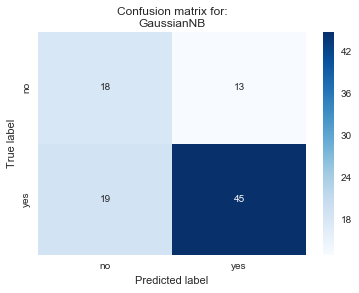

In [11]:
# Plot a confusion matrix as a heatmap for each model
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Compute confusion matrices
cm_A = confusion_matrix(y_test.values, clf_A.predict(X_test))
cm_B = confusion_matrix(y_test.values, clf_B.predict(X_test))
cm_C = confusion_matrix(y_scaled_test.values, clf_C.predict(X_scaled_test))

# view with a heatmap
sns.heatmap(cm_A, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf_A.__class__.__name__));

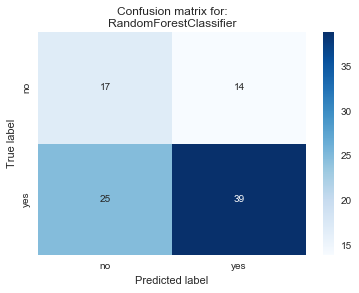

In [12]:
sns.heatmap(cm_B, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf_B.__class__.__name__));

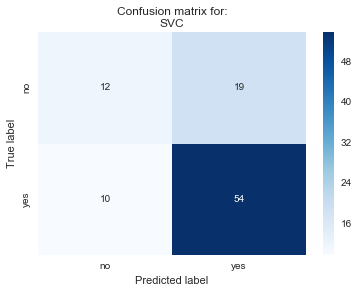

In [13]:
sns.heatmap(cm_C, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf_C.__class__.__name__));

## Choosing the Best Model
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F<sub>1</sub> score. 

### Question 3 - Choosing the Best Model
*Based on the experiments you performed earlier, in one to two paragraphs, explain to the board of supervisors what single model you chose as the best model. Which model is generally the most appropriate based on the available data, limited resources, cost, and performance?*

**Answer: **

  The problem we're trying to solve can be broken down into a few key parts. First, our dataset is very small and the majority of students passed. We're trying to model a student who is at risk of not passing, leaving us very few examples of the sort of student we're looking for, so we desperately need to avoid overfitting - that is, not assuming the examples we do have are a perfect representation of all at risk students. Second, our feature set is likewise small but, more importantly, we don't know anything about how strong the effect of any given feature might be, both on the outcome and on the other features. Regardless of the model we choose we'll have to manage this somehow, but ideally we choose a model that doesn't just predict at risk students but is transparent enough to inform on why a student may be at risk. Then we not only know when to intervene, but have potential actionable suggestions as to how. Lastly, the question of efficiency. Frankly, this dataset is small enough that we'd be hard pressed to make a model that takes any significant resources making predictions, but that's no reason to be lazy about it.

These three problems are dealt with readily by a Random Forest classifier. It'll work well with a small amount of data and counteracts overfitting by design, it'll weigh feature importance automatically and make retrieving those weights straightforward, and as a bonus it will be very efficient to train and make predictions with. It's a very popular model to use for tasks like this, and for good reason.

**Note: ** This decision is not based solely on the numbers above, as the question asks for, as I found RANDOM_STATE to have an enormous affect on the models sans parameter tuning and felt that that was not a reasonable method of choosing a model. Across a range of random states the random forest and support vector machine both had roughly the same performance, so other justification was needed.

### Question 4 - Model in Layman's Terms
*In one to two paragraphs, explain to the board of directors in layman's terms how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical or technical jargon, such as describing equations or discussing the algorithm implementation.*

**Answer: **

Everyone's used a flow chart before, right? You start at the top then follow one path or the other depending on what it says. Like if we wanted to know what species a tree was we might have a flow chart that starts by asking "does it have needles? Go left. Leaves? Go right." And we follow it down until we get to a question so specific it must be just one species of tree. Decision tree is just another name for a flow chart, and you build one in much the same way - you go through the possible questions and pick the most general one, like leaves versus needles, then get more and more specific until you only have one possibility for what you're looking at.

Our case of trying to identify students who need intervention isn't as straightforward as identifying trees though. We can build a decision tree based of the information we have about previous students, maybe it would ask 'does the student have internet access? Go left. No? Go right.' But how do we know which question to ask first? And what does this mean for new students? No two students are as similar as species of tree. This is where the Random Forest technique comes in: instead of making one tree, we make many trees. For each one we'll look at a different selection of the previous students and a different set of the possible questions and let it decide which questions to ask and in what order. Maybe it does a good job, maybe not, but then when we have a student we want to assess we pass their information into every one of our many trees and have them all vote on an answer. In aggregate you end up with a much better answer than any one tree could provide on its own.

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.gridSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
- Initialize the classifier you've chosen and store it in `clf`.
- Create the F<sub>1</sub> scoring function using `make_scorer` and store it in `f1_scorer`.
 - Set the `pos_label` parameter to the correct value!
- Perform grid search on the classifier `clf` using `f1_scorer` as the scoring method, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_obj`.

In [14]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune
n_estimators_range = range(40,106,5)
parameters_RF = {'n_estimators':n_estimators_range,'oob_score':[True], 'warm_start':[True], 'criterion':['gini','entropy']}

#Default parameters for Random Forest, for reference
"""n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
max_features='auto', max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, 
warm_start=False, class_weight=None"""

# TODO: Initialize the classifier
clf_RF = RandomForestClassifier(random_state = RANDOM_STATE)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj_RF = GridSearchCV(estimator = clf_RF, param_grid = parameters_RF, cv = 5, scoring = f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj_RF = grid_obj_RF.fit(X_train,y_train)

# Get the estimator
clf_RF = grid_obj_RF.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned RF model has a training F1 score of {:.4f}.".format(predict_labels(clf_RF, X_train, y_train))
print "Tuned RF model has a testing F1 score of {:.4f}.".format(predict_labels(clf_RF, X_test, y_test))

print grid_obj_RF.best_params_
print clf_RF.score(X_test,y_test)

Made predictions in 0.0160 seconds.
Tuned RF model has a training F1 score of 1.0000.
Made predictions in 0.0000 seconds.
Tuned RF model has a testing F1 score of 0.8028.
{'n_estimators': 95, 'warm_start': True, 'oob_score': True, 'criterion': 'entropy'}
0.705263157895


### Visualizing GridSearchCV<sup>2</sup>

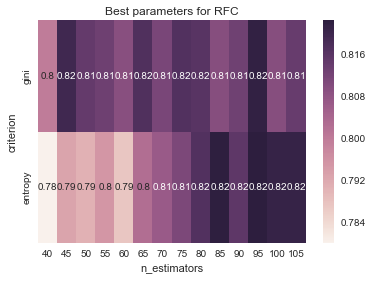

In [15]:
scores = [x[1] for x in grid_obj_RF.grid_scores_]
scores = np.array(scores).reshape(2,len(n_estimators_range))

sns.heatmap(scores, annot = True, xticklabels = n_estimators_range, yticklabels = ['gini','entropy'])
sns.axlabel('n_estimators','criterion')
plt.title('Best parameters for RFC')

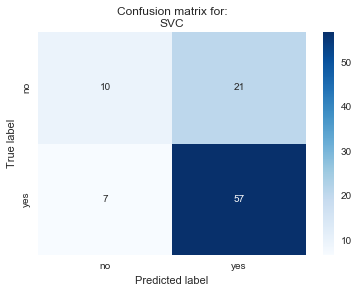

In [16]:
# Confusion matrix for the tuned model
cm_RF = confusion_matrix(y_test.values, clf_RF.predict(X_test))
sns.heatmap(cm_RF, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf_C.__class__.__name__));

### SVM Tuning
I ran the optimization on both the random forest classifier and support vector machine classifier, despite answering 
questions as if having chosen just random forest. This was for two reasons: first, I didn't know which was better and felt the 
default settings were a poor way of judging, and second because I know these are popular algorithms and wanted practice with 
both regardless of the outcome. The parameter tuning for SVM is below. Note that, as the confusion matrix shows, the tuned classifier favors labeling everything 'yes'. Since this wasn't my main choice I didn't put in the effort to steer it away from this, but it's a good example of the accuracy paradox since the untuned model isn't so extreme despite scoring lower.

In [17]:
# TODO: Import 'GridSearchCV' and 'make_scorer'
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import make_scorer

# TODO: Create the parameters list you wish to tune

#Coarse parameter grid - test 2**x over range, incrementing by x+2
#C_range = np.logspace(-5,15,base=2,num=11)
#g_range = np.logspace(-15,3,base=2,num=10)
#parameters_SVM = {'C':C_range,'gamma':g_range,'kernel':['rbf','sigmoid']}

#Fine parameter grid - incrementing by x+.25 in neighborhood of best choice from above
C_range = np.logspace(0,21,base=2,num=10)
g_range = np.logspace(-5,-2.8,base=2,num=10)
parameters_SVM = {'C':C_range,'gamma':g_range,'kernel':['rbf']}

#Default parameters for SVM, for reference
"""C=1.0, kernel='rbf', degree=3, gamma='auto', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, 
class_weight=None, verbose=False, max_iter=-1, decision_function_shape=None, random_state=None"""

# TODO: Initialize the classifier
clf_SVM = SVC(random_state = RANDOM_STATE)

# TODO: Make an f1 scoring function using 'make_scorer' 
f1_scorer = make_scorer(f1_score,pos_label='yes')

# TODO: Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj_SVM = GridSearchCV(estimator = clf_SVM, param_grid = parameters_SVM, cv=10, scoring = f1_scorer)

# TODO: Fit the grid search object to the training data and find the optimal parameters
grid_obj_SVM = grid_obj_SVM.fit(X_scaled_train,y_scaled_train)

# Get the estimator
clf_SVM = grid_obj_SVM.best_estimator_

# Report the final F1 score for training and testing after parameter tuning
print "Tuned SVM model has a training F1 score of {:.4f}.".format(predict_labels(clf_SVM, X_scaled_train, y_scaled_train))
print "Tuned SVM model has a testing F1 score of {:.4f}.".format(predict_labels(clf_SVM, X_scaled_test, y_scaled_test))

print grid_obj_SVM.best_params_

Made predictions in 0.0000 seconds.
Tuned SVM model has a training F1 score of 1.0000.
Made predictions in 0.0000 seconds.
Tuned SVM model has a testing F1 score of 0.7871.
{'kernel': 'rbf', 'C': 5.0396841995794928, 'gamma': 0.086369554997986014}


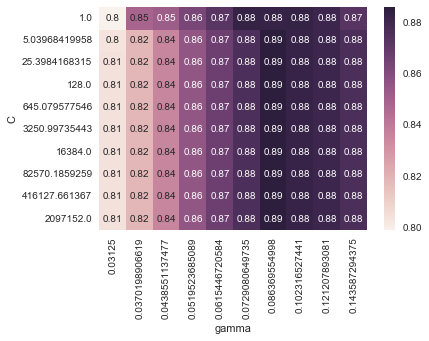

In [18]:
# Visualize GridSearchCV as above
scores = [x[1] for x in grid_obj_SVM.grid_scores_]
scores = np.array(scores).reshape(len(C_range), len(g_range))

sns.heatmap(scores, annot = True, xticklabels = g_range, yticklabels = C_range)
sns.axlabel('gamma','C')

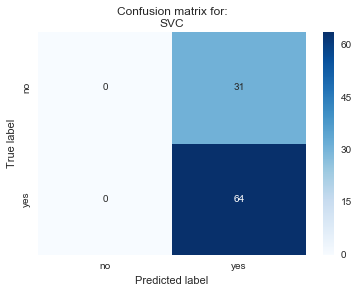

In [19]:
# Confusion matrix for the tuned model
cm_SVM = confusion_matrix(y_test.values, clf_SVM.predict(X_test))
sns.heatmap(cm_SVM, annot=True, cmap='Blues', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(clf_C.__class__.__name__));

In [20]:
# In case you run any tests on the code, here are pointers using the original names
parameters = parameters_RF
clf = clf_RF
grid_obj = grid_obj_RF

### Decision Tree Visualization<sup>3</sup>
The following code creates a visual of one of the decision trees in the Random Forest classifier. This was mostly done for my own curiosity, I know it's not a representation of the classifier as a whole. An example .png can be found in my GitHub repo. Running this code requires GraphViz to be installed locally, which can be found here: http://www.graphviz.org/Download..php

In [21]:
"""
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydot 
dot_data = StringIO()

export_graphviz(clf_RF.estimators_[3], out_file=dot_data, feature_names=X_all.columns, filled=True, rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())[0]
Image(graph.create_png())
"""

'\nfrom sklearn.externals.six import StringIO\nfrom sklearn.tree import export_graphviz\nfrom IPython.display import Image\nimport pydot \ndot_data = StringIO()\n\nexport_graphviz(clf_RF.estimators_[3], out_file=dot_data, feature_names=X_all.columns, filled=True, rounded=True)\ngraph = pydot.graph_from_dot_data(dot_data.getvalue())[0]\nImage(graph.create_png())\n'

### Question 5 - Final F<sub>1</sub> Score
*What is the final model's F<sub>1</sub> score for training and testing? How does that score compare to the untuned model?*

**Answer: **

The final model has a training F1 score of 1.000 and a testing F1 score of 0.8028. The untuned model had scores of 0.9989 and 0.6949, and 0.9900 and 0.7538 trained on unbalanced data. This seems to be a significant improvement. It's notable, however, that the confusion matrix for the untuned and tuned models show a swing from many false negatives to many false positives which, in spite of scoring better, might be a worse choice. If we want to intervene with the most at risk students, even at the expense of intervening with more students who don't need it, then the untuned model would serve that purpose better.

### Notes
I mention in answer 3 that getting the weights out of the random forest classifier could be helpful. I didn't implement this since there's no actual interventions happening, but I do believe it is a nice benefit that RFC does this automatically.

Using such a small dataset made aspects of this project quite frustrating. The random state used had a significant impact on the models which I suspect is due to the way it splits the data, and while some modifications suggested by a reviewer helped mitigate this (balancing the training data and using the stratify parameter in train_test_split) the gains were marginal. Usually the end result of tuning was an improvement over the untuned model, but a hypothetical classifier that simply returns 'yes' for every student would score nearly as well or better. Like I said in answer 5 I found myself running into the accuracy paradox quite a bit with the highest scoring models favoring false positives over true negatives. Were I further concerned with improving the model I would try using a different scoring method. I'd also look into feature selection to try and counteract noise in the data.

I also ran into one thing that confused me quite a bit: sometimes the result of testing more parameters with GridSearchCV would be a lower F1 score despite knowing that, were it to choose differently, a higher score could be achieved. For example, adding 'max_features':['auto','log2'] to parameters_RF results in GridSearchCV choosing log2 at a loss of about .04 on the F1 score. Not being able to visualize more than two dimensions I have no idea what it's doing, and having to manually avoid giving it the option feels like a hack that defeats the point of using it in the first place.

### Citations
[1] Based off of code found here http://blog.districtdatalabs.com/visual-diagnostics-for-more-informed-machine-learning-part-3  
[2] Code given by project reviewer. Sorry I don't know who to cite, but thank you  
[3] Code largely drawn from http://scikit-learn.org/stable/modules/tree.html  

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.